In [2]:
import numpy as np
from dist_analy import dist_analy
from prody.atomic import Atomic, Residue, Atom
from prody.proteins import pdbfile
from prody.measure import buildDistMatrix
from prody.utilities import getDistance
from prody.database.uniprot import queryUniprot ### this can be useful
from prody.utilities import openURL
import matplotlib.pyplot as plt
from timeit import time

from pypdb import *
from prody import *

from prody.proteins import pdbfile
from dist_analy.dist_analy import build_shortest_dist_matrix

import Bio
print(Bio.__version__)

%load_ext autoreload
%autoreload 2

1.78
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
print (prody.__file__)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/prody/__init__.py


## testing query for PDB

In [27]:
import requests as re
search_api_url = 'https://search.rcsb.org/rcsbsearch/v1/query?json='

search = {
  "query": {
    "type": "group",
    "logical_operator": "and",
    "nodes": [
      {
        "type": "terminal",
        "service": "text",
        "parameters": {
          "operator": "exact_match",
          "value": "P24941",
          "attribute": "rcsb_polymer_entity_container_identifiers.reference_sequence_identifiers.database_accession"
        }
      },
      {
        "type": "terminal",
        "service": "text",
        "parameters": {
          "operator": "exact_match",
          "value": "UniProt",
          "attribute": "rcsb_polymer_entity_container_identifiers.reference_sequence_identifiers.database_name"
        }
      }
    ]
  },
    "request_options": {
    "return_all_hits": True},
  "return_type": "polymer_entity"
}

"https://search.rcsb.org/rcsbsearch/v1/query?json=%7B%22query%22:%7B%22type%22:%22group%22,%22logical_operator%22:%22and%22,%22nodes%22:%5B%7B%22type%22:%22terminal%22,%22service%22:%22text%22,%22parameters%22:%7B%22operator%22:%22exact_match%22,%22value%22:%22P69905%22,%22attribute%22:%22rcsb_polymer_entity_container_identifiers.reference_sequence_identifiers.database_accession%22%7D%7D,%7B%22type%22:%22terminal%22,%22service%22:%22text%22,%22parameters%22:%7B%22operator%22:%22exact_match%22,%22value%22:%22UniProt%22,%22attribute%22:%22rcsb_polymer_entity_container_identifiers.reference_sequence_identifiers.database_name%22%7D%7D%5D%7D,%22return_type%22:%22polymer_entity%22%7D"
search_json = json.dumps(search, indent=4)
response = re.post(search_api_url, search_json)
print(response.url)
#  = pypdb.http_requests.request_limited(search_api_url, search)
result = str(response.text)
print(result)

https://search.rcsb.org/rcsbsearch/v1/query?json=
{
  "query_id" : "b0f4eb9f-dcc3-43c4-9c0d-53bc4bc5e5a1",
  "result_type" : "polymer_entity",
  "total_count" : 418,
  "explain_meta_data" : {
    "total_timing" : 32,
    "terminal_node_timings" : {
      "18610" : 25
    }
  },
  "result_set" : [ {
    "identifier" : "3R8P_1",
    "score" : 1.0,
    "services" : [ {
      "service_type" : "text",
      "nodes" : [ {
        "node_id" : 18610,
        "original_score" : 130.11929321289062,
        "norm_score" : 1.0
      } ]
    } ]
  }, {
    "identifier" : "3PXQ_1",
    "score" : 1.0,
    "services" : [ {
      "service_type" : "text",
      "nodes" : [ {
        "node_id" : 18610,
        "original_score" : 130.11929321289062,
        "norm_score" : 1.0
      } ]
    } ]
  }, {
    "identifier" : "3PY0_1",
    "score" : 1.0,
    "services" : [ {
      "service_type" : "text",
      "nodes" : [ {
        "node_id" : 18610,
        "original_score" : 130.11929321289062,
        "norm_

In [97]:
# search by uniprot accession
cdk2_uniprot = 'P24941'
# editted pypdb to search by uniprot accession ... will need to submit a pull request eventually

found_pdbs = Query(cdk2_uniprot, query_type="uniprot").search()
print(found_pdbs)

['2CCI', '2CCH', '2CJM', '2CLX', '2DS1', '2DUV', '2IW6', '2IW9', '2IW8', '2JGZ', '2J9M', '2I40', '2EXM', '2FVD', '2G9X', '1W8C', '1W98', '1VYZ', '1VYW', '1WCC', '1Y91', '1Y8Y', '1YKR', '2A0C', '2A4L', '2BHH', '2BHE', '2BKZ', '2BPM', '2C4G', '2C5Y', '2C5X', '2C69', '2C68', '2C5V', '2BTS', '2BTR', '2C5O', '2C5N', '2C6L', '2C6K', '2C6I', '2C6T', '2C6O', '2C6M', '1W0X', '2R3J', '2R3I', '2R3H', '2R3G', '2R3F', '2R3R', '2R3Q', '2R3P', '2R3O', '2R3N', '2R3M', '2R3L', '2R3K', '2R64', '4FX3', '4GCJ', '4D1Z', '4D1X', '4CFW', '4CFX', '4KD1', '3MY5', '3NS9', '3TI1', '3TIY', '3TIZ', '3TNW', '3ULI', '3UNJ', '3UNK', '3QHR', '3QHW', '3QL8', '3R1Q', '3QQK', '3QQL', '3QQF', '3QQG', '3QQH', '3QQJ', '3R1S', '3R28', '3R1Y', '3QRT', '3QRU', '3QU0', '3QTQ', '3QTR', '3QTS', '3QTU', '3PXY', '3PXZ', '3PY0', '3PY1', '3PXQ', '3PXR', '3PXF', '3R71', '3R73', '3QTW', '3QTX', '3QTZ', '3R83', '3R7U', '3R7V', '3R7I', '3R7E', '3R6X', '3QX2', '3QX4', '3R8U', '3R8V', '3QWJ', '3QWK', '3R8L', '3R8M', '3R8P', '3R7Y', '3R9N',

In [127]:
print(len(found_pdbs))

416


In [30]:
outdir = './datafiles/pdb_files/cdk2/pdb/'
for pdb in found_pdbs:
    pdb_file = get_pdb_file(pdb, filetype='pdb', compression=False)
    fn = outdir + pdb + ".pdb"
    print(fn)
    with open(fn,'w') as f1:
        f1.write(pdb_file)
    

./datafiles/pdb_files/cdk2/pdb/2R3J.pdb
./datafiles/pdb_files/cdk2/pdb/2R3I.pdb
./datafiles/pdb_files/cdk2/pdb/2R3H.pdb
./datafiles/pdb_files/cdk2/pdb/2R3G.pdb
./datafiles/pdb_files/cdk2/pdb/2R3F.pdb
./datafiles/pdb_files/cdk2/pdb/2R3R.pdb
./datafiles/pdb_files/cdk2/pdb/2R3Q.pdb
./datafiles/pdb_files/cdk2/pdb/2R3P.pdb
./datafiles/pdb_files/cdk2/pdb/2R3O.pdb
./datafiles/pdb_files/cdk2/pdb/2R3N.pdb
./datafiles/pdb_files/cdk2/pdb/2R3M.pdb
./datafiles/pdb_files/cdk2/pdb/2R3L.pdb
./datafiles/pdb_files/cdk2/pdb/2R3K.pdb
./datafiles/pdb_files/cdk2/pdb/2R64.pdb
./datafiles/pdb_files/cdk2/pdb/1JVP.pdb
./datafiles/pdb_files/cdk2/pdb/1KE9.pdb
./datafiles/pdb_files/cdk2/pdb/1KE8.pdb
./datafiles/pdb_files/cdk2/pdb/1KE7.pdb
./datafiles/pdb_files/cdk2/pdb/1KE6.pdb
./datafiles/pdb_files/cdk2/pdb/1KE5.pdb
./datafiles/pdb_files/cdk2/pdb/6YL1.pdb
./datafiles/pdb_files/cdk2/pdb/6YL6.pdb
./datafiles/pdb_files/cdk2/pdb/6YLK.pdb
./datafiles/pdb_files/cdk2/pdb/1AQ1.pdb
./datafiles/pdb_files/cdk2/pdb/1B39.pdb


./datafiles/pdb_files/cdk2/pdb/3QTZ.pdb
./datafiles/pdb_files/cdk2/pdb/3R83.pdb
./datafiles/pdb_files/cdk2/pdb/3R7U.pdb
./datafiles/pdb_files/cdk2/pdb/3R7V.pdb
./datafiles/pdb_files/cdk2/pdb/3R7I.pdb
./datafiles/pdb_files/cdk2/pdb/3R7E.pdb
./datafiles/pdb_files/cdk2/pdb/3R6X.pdb
./datafiles/pdb_files/cdk2/pdb/3QX2.pdb
./datafiles/pdb_files/cdk2/pdb/3QX4.pdb
./datafiles/pdb_files/cdk2/pdb/3R8U.pdb
./datafiles/pdb_files/cdk2/pdb/3R8V.pdb
./datafiles/pdb_files/cdk2/pdb/3QWJ.pdb
./datafiles/pdb_files/cdk2/pdb/3QWK.pdb
./datafiles/pdb_files/cdk2/pdb/3R8L.pdb
./datafiles/pdb_files/cdk2/pdb/3R8M.pdb
./datafiles/pdb_files/cdk2/pdb/3R8P.pdb
./datafiles/pdb_files/cdk2/pdb/3R7Y.pdb
./datafiles/pdb_files/cdk2/pdb/3R9N.pdb
./datafiles/pdb_files/cdk2/pdb/3QXO.pdb
./datafiles/pdb_files/cdk2/pdb/3R9O.pdb
./datafiles/pdb_files/cdk2/pdb/3QXP.pdb
./datafiles/pdb_files/cdk2/pdb/3R9D.pdb
./datafiles/pdb_files/cdk2/pdb/3R9H.pdb
./datafiles/pdb_files/cdk2/pdb/3R8Z.pdb
./datafiles/pdb_files/cdk2/pdb/3QZF.pdb


./datafiles/pdb_files/cdk2/pdb/1BUH.pdb
./datafiles/pdb_files/cdk2/pdb/1CKP.pdb
./datafiles/pdb_files/cdk2/pdb/1E9H.pdb
./datafiles/pdb_files/cdk2/pdb/1DI8.pdb
./datafiles/pdb_files/cdk2/pdb/1DM2.pdb
./datafiles/pdb_files/cdk2/pdb/6RIJ.pdb


In [24]:
count = 0
for pdb in found_pdbs:
    fn = outdir + pdb + ".pdb"
    structure = parsePDB(fn)
    if count > 10: break
    sel = structure.select('occupancy < 1')
    if sel:
        print(pdb, sorted(set(sel.getResnums())))
        count += 1
#     print()
#     if structure.numAtoms('occupancy < 1'):
#         print(pdb)
#         

@> 2497 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 2672 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 2559 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 2614 atoms and 1 coordinate set(s) were parsed in 0.06s.


2R3J [32, 115, 177, 200, 212, 232, 233]
2R3I [32, 53, 115, 126, 131, 177, 200, 212, 217, 232, 233, 264, 265, 501]
2R3H [63, 118, 126, 132, 200, 232, 264, 265, 272]


@> 2588 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 2591 atoms and 1 coordinate set(s) were parsed in 0.07s.


2R3G [63, 65, 118, 143, 200, 232, 264, 265]
2R3F [88, 126, 200, 264, 265, 501]
2R3R [63, 89, 118, 126, 200, 232, 264, 265, 272]


@> 2620 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 2607 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 2546 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 2428 atoms and 1 coordinate set(s) were parsed in 0.04s.


2R3Q [89, 126, 131, 177, 200, 212, 217, 232, 233, 264, 265, 501]
2R3P [115, 126, 177, 212, 233, 264, 265, 501]
2R3O [132, 177, 232, 233, 264, 265]


@> 2493 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 2423 atoms and 1 coordinate set(s) were parsed in 0.04s.


2R3N [118, 132, 177, 232, 233, 264, 265]
2R3M [169, 177, 233, 264, 265]


## Testing SIFTS with pdbe api

In [3]:
import urllib
import gzip
pdb = ['6gue', '4eoq']
# %s.xml.gz'%pdb
opener = urllib.request.build_opener(urllib.request.FTPHandler('ftp://ftp.ebi.ac.uk/pub/databases/msd/sifts/xml/'))

site = urllib.request.urlopen('ftp://ftp.ebi.ac.uk/pub/databases/msd/sifts/xml/')
#     with gzip.GzipFile(fileobj=gz_file) as zippy:
#         data = zippy.read()
# print(data)

TypeError: object() takes no parameters

In [81]:
print(data)

b'<?xml version=\'1.0\' encoding=\'UTF-8\' standalone=\'yes\'?>\n<entry xmlns:align="http://www.ebi.ac.uk/pdbe/docs/sifts/alignment.xsd" xmlns:data="http://www.ebi.ac.uk/pdbe/docs/sifts/dataTypes.xsd" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.ebi.ac.uk/pdbe/docs/sifts/eFamily.xsd" dbSource="PDBe" dbVersion="2.0" dbCoordSys="PDBe" dbAccessionId="4eoq" dbEntryVersion="2013-02-06" date="2021-01-02" xsi:schemaLocation="http://www.ebi.ac.uk/pdbe/docs/sifts/eFamily.xsd http://www.ebi.ac.uk/pdbe/docs/sifts/eFamily.xsd">\n  <rdf:RDF>\n    <rdf:Description rdf:about="self">\n      <dc:rights rdf:resource="http://pdbe.org/sifts">\n        Copyright notice: (c) 2004-2020, EMBL-EBI, PDBe-UniProt\n        Jose M. Dana, Nidhi Tyagi, Preeti Choudhary, Aleksandras Gutmanas, Claire O\'Donovan, Maria J. Martin, Sameer Velankar.\n        The information included is supplied as

In [85]:
for x,y in zip(data,uncompressed):
    if x != y:
        print(x,y)

In [40]:
from io import BytesIO
from ftplib import FTP
import gzip

pdb = '6amv'
chain ='A'
ftp_url = 'ftp.ebi.ac.uk' #pub/databases/msd/sifts/xml/%s.xml.gz'%pdb
ftp = FTP(ftp_url)
ftp.login()

# ftp.cwd('pub/databases/msd/sifts')
# ftp.retrlines('LIST')  

BIO = BytesIO()
resp = ftp.retrbinary("RETR /pub/databases/msd/sifts/xml/%s.xml.gz"%pdb, callback=BIO.write)
BIO.seek(0) # Go back to the start
zippy = gzip.GzipFile(fileobj=BIO)

data = zippy.read()
print(data)

ftp.quit()

220-Welcome to ftp.ebi.ac.uk
220 
230 Login successful.
200 Switching to Binary mode.
227 Entering Passive Mode (193,62,193,138,208,173).
150 Opening BINARY mode data connection for /pub/databases/msd/sifts/xml/6amv.xml.gz (14361 bytes).
226 Transfer complete.
b'<?xml version=\'1.0\' encoding=\'UTF-8\' standalone=\'yes\'?>\n<entry xmlns:align="http://www.ebi.ac.uk/pdbe/docs/sifts/alignment.xsd" xmlns:data="http://www.ebi.ac.uk/pdbe/docs/sifts/dataTypes.xsd" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.ebi.ac.uk/pdbe/docs/sifts/eFamily.xsd" dbSource="PDBe" dbVersion="2.0" dbCoordSys="PDBe" dbAccessionId="6amv" dbEntryVersion="2020-01-01" date="2021-02-07" xsi:schemaLocation="http://www.ebi.ac.uk/pdbe/docs/sifts/eFamily.xsd http://www.ebi.ac.uk/pdbe/docs/sifts/eFamily.xsd">\n  <rdf:RDF>\n    <rdf:Description rdf:about="self">\n      <dc:rights rdf:resource="http:

'221 Goodbye.'

In [38]:
import xml.etree.ElementTree as ET
tree = ET.ElementTree(ET.fromstring(data))
root = tree.getroot()

pre = '{'+root.attrib['{http://www.w3.org/2001/XMLSchema-instance}schemaLocation'].split()[0]+'}'
dict_repl = {}
excl = ['Cloning artifact', 'Not_Observed', 'Expression tag']
for entity in root.iter('%sentity'%pre):
    if entity.attrib['entityId']==chain:
        ignore_count = 0
        for res in entity.iter('%sresidue'%pre):
            skip = False
            for detail in res.iter('%sresidueDetail'%pre):
                if detail.text in excl: 
                    skip=True
                    continue
            if skip: continue
            pdb_id = res.find(".//%scrossRefDb[@dbSource='PDB']"%pre).attrib['dbResNum']
            try:
                unip_id = res.find(".//%scrossRefDb[@dbSource='UniProt']"%pre).attrib['dbResNum']
            except AttributeError:
                unip_id = -999 + ignore_count
                ignore_count += 1
            dict_repl[pdb_id] = unip_id

# print(dict_repl)
#     if int(pdb_id) == start_res: uniprot_start = int(unip_id)
#     if int(pdb_id) == end_res: uniprot_end = int(unip_id)

In [39]:
from pprint import pprint
pprint(dict_repl)

{'1': -999,
 '10': -990,
 '100': '81',
 '101': '82',
 '102': '83',
 '103': '84',
 '104': '85',
 '105': '86',
 '106': '87',
 '107': '88',
 '108': '89',
 '109': '90',
 '11': -989,
 '110': '91',
 '111': '92',
 '112': '93',
 '113': '94',
 '114': '95',
 '115': '96',
 '116': '97',
 '117': '98',
 '118': '99',
 '119': '100',
 '12': -988,
 '120': '101',
 '121': '102',
 '122': '103',
 '123': '104',
 '124': '105',
 '125': '106',
 '126': '107',
 '127': '108',
 '128': '109',
 '129': '110',
 '13': -987,
 '130': '111',
 '131': '112',
 '132': '113',
 '133': '114',
 '134': '115',
 '135': '116',
 '136': '117',
 '137': '118',
 '138': '119',
 '139': '120',
 '14': -986,
 '140': '121',
 '141': '122',
 '142': '123',
 '143': '124',
 '144': '125',
 '145': '126',
 '146': '127',
 '147': '128',
 '148': '129',
 '149': '130',
 '15': -985,
 '150': '131',
 '151': '132',
 '152': '133',
 '153': '134',
 '154': '135',
 '155': '136',
 '156': '137',
 '157': '138',
 '158': '139',
 '159': '140',
 '16': -984,
 '160': '141',
 

## Testing SIFTS

In [27]:
import requests
r = requests.get("https://www.ebi.ac.uk/pdbe/api/mappings/%s"%"4jrv")
print(r)

<Response [200]>


In [48]:
from dist_analy import import_pdb
import xml.etree.ElementTree as ET
SIFTS = import_pdb.get_any_info('4jrv', "https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/")
print(SIFTS['4jrv']['UniProt']['P00533'])

# how to handle pdb structures that begin residue counting at negative number? (2WPA)
# how to 
cdk2_uniprot = 'P24941'



{'identifier': 'EGFR_HUMAN', 'name': 'EGFR_HUMAN', 'mappings': [{'entity_id': 1, 'end': {'author_residue_number': None, 'author_insertion_code': '', 'residue_number': 328}, 'chain_id': 'A', 'start': {'author_residue_number': 672, 'author_insertion_code': '', 'residue_number': 3}, 'unp_end': 1021, 'unp_start': 696, 'struct_asym_id': 'A'}]}


In [13]:
from pypdb.util import http_requests
import json

def query_SIFTS_info(pdbid, plain='2', qtype='pdb', root_url='http://www.bioinf.org.uk/servers/pdbsws/query.cgi', **request_dict):
#     request_dict = {}

    request_dict['plain']=plain
    request_dict['qtype']=qtype
    request_dict['id']=pdbid

    response = http_requests.request_limited(root_url, params=request_dict)
    
    if response.status_code == 200:
        pass
    else:
        raise ValueError("json retrieval failed, returning None")
        return None

    result = str(response.text)
    out = json.loads(result)

    return out

# %timeit query_SIFTS_info('4eoq',res='23', chain='A')
# %timeit query_SIFTS_info('4eoq',all='yes', chain='A')

In [130]:
query_SIFTS_info('6RIJ') 

{'pdbsws': []}

In [3]:
def check_one_SIFTS_res(pdbid, chain, res):
#     print(query_SIFTS_info(pdbid, chain=chain, res=res))
    SIFTS_info = query_SIFTS_info(pdbid, chain=chain, res=res)['pdbsws'][0]
#     print(SIFTS_info)
    if SIFTS_info['RESID'] == SIFTS_info['UPCOUNT']:
        return None, None
    else:
        return (int(SIFTS_info['RESID']), int(SIFTS_info['UPCOUNT']))
    
# need to get the starting and ending residues of the protein structure to check
# the database includes extraneous residues included in the SEQRES but may not be
# included in the PDB file itself

# if negative start check at 1
# check last residue after removing water and extraneous ligands
def check_start_stop_SIFTS_res(pdbid, chain, start, stop):
#     SIFTS_info_1 = query_SIFTS_info(pdbid, chain=chain)['pdbsws'][0]
#     print(SIFTS_info_1)
#     start = SIFTS_info_1['START']
#     stop = SIFTS_info_1['STOP']
    pdbA, unipA = check_one_SIFTS_res(pdbid, chain, start)
    pdbB, unipB = check_one_SIFTS_res(pdbid, chain, stop)
    return ((pdbA, unipA), (pdbB, unipB))

    
def shift_res(chain_object, shift):
    for i, residue in enumerate(reversed(list(chain_object.get_residues()))):
        res_id = list(residue.id)
        res_id[1] = res_id[1] + shift
        residue.id = tuple(res_id)
    
# def shift_res_1(chain_object, shift):
#     for i, residue in reversed(list(enumerate(chain_object.get_residues()))):
#         res_id = list(residue.id)
#         res_id[1] = res_id[1] + shift
#         residue.id = tuple(res_id)
    
def replace_with_SIFTS(chain_object, pdbid, chain):
    SIFTS_info = query_SIFTS_info(pdbid, chain=chain, all='yes')['pdbswsaln']
    replace_dict = {}
    for dictionary in SIFTS_info:
#         print(dictionary)
#         print(dictionary['resid'], dictionary['swscount'])
        if all(key in dictionary for key in ('resid', 'swscount')):
            replace_dict[dictionary['resid']] = dictionary['swscount']
        else:
            continue

    for i, residue in enumerate(reversed(list(chain_object.get_residues()))):
        res_id = list(residue.id)
        if str(res_id[1]) in replace_dict:
            res_id[1] = int(replace_dict[str(res_id[1])])
            residue.id = tuple(res_id)

#     print(SIFTS_info)
#     for i, residue in enumerate(reversed(list(chain_object.get_residues()))):

In [4]:
replace_with_SIFTS(chain_obj,'4JRV','A')

NameError: name 'chain_obj' is not defined

In [14]:
from Bio.PDB import PDBParser, Select, PDBIO
from dist_analy.import_pdb import Dry_Apo_PDB

path = './datafiles/pdb_files/testing/'
filename = '4JRV.pdb'
pdb = '4JRV'
outpath = './datafiles/pdb_files/processed_pdb'

parse = PDBParser()
structure = parse.get_structure(pdb, file=path+filename)[0]
chain = 'A'
chain_obj = structure[chain]

io = PDBIO()
io.set_structure(structure[chain])
io.save("%s/%s_%s.pdb"%(outpath,pdb,chain), select=Dry_Apo_PDB())

temp_structure = parse.get_structure(pdb, file="%s/%s_%s.pdb"%(outpath,pdb,chain))[0]
temp_chain_obj = temp_structure[chain]
start = list(temp_chain_obj)[0].id[1]
stop = list(temp_chain_obj)[-1].id[1]
print(start,stop)

if start < 1:
    start = 1

print(chain_obj)
res1_diff, res2_diff = check_start_stop_SIFTS_res(pdb, chain, start, stop)
if all(res1_diff) and all(res2_diff):
    if abs(res1_diff[0]-res1_diff[1]) == abs(res2_diff[0]-res2_diff[1]):
        shift_res(temp_chain_obj, abs(res1_diff[0]-res1_diff[1]))  
    else:
        replace_with_SIFTS(temp_chain_obj, pdb, chain)
elif all(res1_diff) or all(res2_diff):
    replace_with_SIFTS(temp_chain_obj, pdb, chain)
        

io.set_structure(temp_chain_obj)
io.save("%s/%s_%s.pdb"%(outpath,pdb,chain), select=Dry_Apo_PDB())


{'SER', 'TYR', 'GLY', 'ASN', 'THR', 'ASP', 'PRO', 'GLU', 'HIS', 'TRP', 'MET', 'PHE', 'LYS', 'GLN', 'ARG', 'VAL', 'ALA', 'CYS', 'ILE', 'LEU'}
672 995
<Chain id=A>
{'SER', 'TYR', 'GLY', 'ASN', 'THR', 'ASP', 'PRO', 'GLU', 'HIS', 'TRP', 'MET', 'PHE', 'LYS', 'GLN', 'ARG', 'VAL', 'ALA', 'CYS', 'ILE', 'LEU'}


In [61]:
from dist_analy.import_pdb import PDB_Processer
x = PDB_Processer()
data = x._get_xml_str('2abl')
dict_repl = x._xml_replace_dict(data, 'A')
print(dict_repl)

{'SER', 'TYR', 'GLY', 'ASN', 'THR', 'ASP', 'PRO', 'GLU', 'HIS', 'TRP', 'MET', 'PHE', 'LYS', 'GLN', 'ARG', 'VAL', 'ALA', 'CYS', 'ILE', 'LEU'}
220-Welcome to ftp.ebi.ac.uk
220 
230 Login successful.
250 Directory successfully changed.
200 Switching to Binary mode.
227 Entering Passive Mode (193,62,197,74,167,81).
150 Opening BINARY mode data connection for 2abl.xml.gz (13243 bytes).
{'75': -999, '76': '57', '77': '58', '78': '59', '79': '60', '80': '61', '81': '62', '82': '63', '83': '64', '84': '65', '85': '66', '86': '67', '87': '68', '88': '69', '89': '70', '90': '71', '91': '72', '92': '73', '93': '74', '94': '75', '95': '76', '96': '77', '97': '78', '98': '79', '99': '80', '100': '81', '101': '82', '102': '83', '103': '84', '104': '85', '105': '86', '106': '87', '107': '88', '108': '89', '109': '90', '110': '91', '111': '92', '112': '93', '113': '94', '114': '95', '115': '96', '116': '97', '117': '98', '118': '99', '119': '100', '120': '101', '121': '102', '122': '103', '123': '104'

In [64]:
from dist_analy.import_pdb import PDB_Processer
x = PDB_Processer()
data = x._get_xml_str('4xey')
dict_repl = x._xml_replace_dict(data, 'A')
print(dict_repl)

inp = '/Users/echen10/Desktop/test_dist_analy/abl/datafiles/raw_pdb/2HIW.pdb'
pdb = '2hiw'
parse = PDBParser()
structure = parse.get_structure(pdb, file=inp)[0]
chain = 'A'
chain_obj = structure[chain]

{'SER', 'TYR', 'GLY', 'ASN', 'THR', 'ASP', 'PRO', 'GLU', 'HIS', 'TRP', 'MET', 'PHE', 'LYS', 'GLN', 'ARG', 'VAL', 'ALA', 'CYS', 'ILE', 'LEU'}
220-Welcome to ftp.ebi.ac.uk
220 
230 Login successful.
250 Directory successfully changed.
200 Switching to Binary mode.
227 Entering Passive Mode (193,62,193,138,165,140)
150 Opening BINARY mode data connection for 4xey.xml.gz (46691 bytes).
{'141': '122', '142': '123', '143': '124', '144': '125', '145': '126', '146': '127', '147': '128', '148': '129', '149': '130', '150': '131', '151': '132', '152': '133', '153': '134', '154': '135', '155': '136', '156': '137', '157': '138', '158': '139', '159': '140', '160': '141', '161': '142', '162': '143', '163': '144', '164': '145', '165': '146', '166': '147', '167': '148', '168': '149', '169': '150', '170': '151', '171': '152', '172': '153', '173': '154', '174': '155', '175': '156', '176': '157', '177': '158', '178': '159', '179': '160', '180': '161', '181': '162', '182': '163', '183': '164', '184': '165'

In [56]:
# print(data)
for residue in chain_obj.get_residues():
    if residue._id[1] == 244:
        print(residue._id[1], vars(residue))
#     break

244 {'level': 'R', 'disordered': 0, 'resname': 'GLY', 'segid': '    ', 'internal_coord': None, '_id': (' ', 244, ' '), 'full_id': ('2hiw', 0, 'A', (' ', 244, ' ')), 'parent': <Chain id=A>, 'child_list': [<Atom N>, <Atom CA>, <Atom C>, <Atom O>], 'child_dict': {'N': <Atom N>, 'CA': <Atom CA>, 'C': <Atom C>, 'O': <Atom O>}, 'xtra': {}}


In [42]:
# 2hiw
SIFTS_info = query_SIFTS_info('2HIW', chain='A', all='yes')['pdbswsaln']
for d in SIFTS_info:
    print(d)

{'pdb': '2hiw', 'chain': 'A', 'pdbcount': '1', 'resnam': 'PRO', 'resid': '248', 'ac': 'P00519', 'swsaa': 'P', 'swscount': '230'}
{'pdb': '2hiw', 'chain': 'A', 'pdbcount': '2', 'resnam': 'ASN', 'resid': '249', 'ac': 'P00519', 'swsaa': 'N', 'swscount': '231'}
{'pdb': '2hiw', 'chain': 'A', 'pdbcount': '3', 'resnam': 'TYR', 'resid': '250', 'ac': 'P00519', 'swsaa': 'Y', 'swscount': '232'}
{'pdb': '2hiw', 'chain': 'A', 'pdbcount': '4', 'resnam': 'ASP', 'resid': '251', 'ac': 'P00519', 'swsaa': 'D', 'swscount': '233'}
{'pdb': '2hiw', 'chain': 'A', 'pdbcount': '5', 'resnam': 'LYS', 'resid': '252', 'ac': 'P00519', 'swsaa': 'K', 'swscount': '234'}
{'pdb': '2hiw', 'chain': 'A', 'pdbcount': '6', 'resnam': 'TRP', 'resid': '253', 'ac': 'P00519', 'swsaa': 'W', 'swscount': '235'}
{'pdb': '2hiw', 'chain': 'A', 'pdbcount': '7', 'resnam': 'GLU', 'resid': '254', 'ac': 'P00519', 'swsaa': 'E', 'swscount': '236'}
{'pdb': '2hiw', 'chain': 'A', 'pdbcount': '8', 'resnam': 'MET', 'resid': '255', 'ac': 'P00519', '

In [35]:
print(list(temp_chain_obj.get_residues())[0])
print(list(chain_obj.get_residues())[0])

SIFTS_info = query_SIFTS_info('4JRV', chain='A', all='yes')['pdbswsaln']
replace_dict = {}
replace_list = []
for dictionary in SIFTS_info:
#     print(dictionary)
#         print(dictionary['resid'], dictionary['swscount'])
    if all(key in dictionary for key in ('resid', 'swscount')):
        replace_dict[dictionary['resid']] = dictionary['swscount']
        replace_list.append(int(dictionary['swscount']))
    else:
        continue

temp_structure_1 = parse.get_structure(pdb, file="%s/%s_%s.pdb"%(outpath,pdb,chain))[0]
temp_chain_obj_1 = temp_structure_1[chain]
temp_chain_obj_1.setResnums(replace_list)

print(list(temp_chain_obj_1.get_residues())[0])

<Residue GLY het=  resseq=696 icode= >
<Residue GLY het=  resseq=672 icode= >


FileNotFoundError: [Errno 2] No such file or directory: "./datafiles/pdb_files/processed_pdb/4JRV_<module 'prody.atomic.chain' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/prody/atomic/chain.py'>.pdb"

In [38]:
from prody.atomic import chain
from Bio.PDB.Chain import Chain
print(type(temp_chain_obj_1), dir(temp_chain_obj_1))
print("***")
print(dir(Chain))
# object_methods = [method_name for method_name in dir(chain) if callable(getattr(chain, method_name))]
# print(object_methods)

<class 'Bio.PDB.Chain.Chain'> ['__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_generate_full_id', '_id', '_reset_full_id', '_translate_id', 'add', 'atom_to_internal_coordinates', 'child_dict', 'child_list', 'copy', 'detach_child', 'detach_parent', 'full_id', 'get_atoms', 'get_full_id', 'get_id', 'get_iterator', 'get_level', 'get_list', 'get_parent', 'get_residues', 'get_unpacked_list', 'has_id', 'id', 'insert', 'internal_coord', 'internal_to_atom_coordinates', 'level', 'parent', 'set_parent', 'transform', 'xtra']
***
['__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__',

In [17]:
check_one_SIFTS_res('2VU3', chain='A', res=10)
check_one_SIFTS_res('5OO0', chain='A', res=10)
check_one_SIFTS_res('4JRV', chain='A', res=672)

(672, 696)

In [67]:
# print(query_SIFTS_info('4jrv', chain='A', res='672'))
print(query_SIFTS_info('4jrv', chain='A', res=997))
print(query_SIFTS_info('4jrv', chain='A', all='yes'))

{'pdbsws': []}
{'pdbswsaln': [{'pdb': '4jrv', 'chain': 'A', 'pdbcount': '1', 'resnam': 'GLY', 'resid': '672', 'ac': 'P00533', 'swsaa': 'G', 'swscount': '696'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '2', 'resnam': 'GLU', 'resid': '673', 'ac': 'P00533', 'swsaa': 'E', 'swscount': '697'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '3', 'resnam': 'ALA', 'resid': '674', 'ac': 'P00533', 'swsaa': 'A', 'swscount': '698'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '4', 'resnam': 'PRO', 'resid': '675', 'ac': 'P00533', 'swsaa': 'P', 'swscount': '699'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '5', 'resnam': 'ASN', 'resid': '676', 'ac': 'P00533', 'swsaa': 'N', 'swscount': '700'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '6', 'resnam': 'GLN', 'resid': '677', 'ac': 'P00533', 'swsaa': 'Q', 'swscount': '701'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '7', 'resnam': 'ALA', 'resid': '678', 'ac': 'P00533', 'swsaa': 'A', 'swscount': '702'}, {'pdb': '4jrv', 'chain': 'A', 'pdbcount': '8', 'resnam': 'LE

In [45]:
print(query_SIFTS_info('4eoq', chain='A', res=159))
print(query_SIFTS_info('4eoq', chain='A', res=160))
# print(query_SIFTS_info('4eoq', chain='A', res='1'))
# check_one_SIFTS_res('4eoq', chain='A', res='1')

{'pdbsws': [{'PDB': '4eoq', 'CHAIN': 'A', 'RESID': '159', 'PDBAA': 'Y', 'AC': 'P24941', 'ID': 'CDK2_HUMAN', 'UPCOUNT': '159', 'UPAA': 'Y'}]}
{'pdbsws': []}


## Handling insertions

In [ ]:
pdb_file = ['1igy.pdb', '1ucy.pdb']
chain_list = ['B', 'L']
insertion_path = './datafiles/pdb_files/insertion/'



## Testing distance matrix calculations

In [54]:
def np_plot(array):
    fig, ax = plt.subplots()
    im = ax.imshow(array, cmap="Blues")
    cbar = ax.figure.colorbar(im,ax=ax)

In [143]:
structure = pdbfile.parsePDB('./datafiles/pdb_files/4EOQ.pdb', chain='A')
res_list_1 = [1,2,3,4,5]
res_list_2 = [4,5,7]
hv = structure.getHierView()
res_obj_1 = np.array(hv['A'])[res_list_1]
res_obj_2 = np.array(hv['A'])[res_list_2]

# def calc_dist_matrix(res_obj):
#     dist = np.zeros((len(res_obj), len(res_obj)))
#     for i,res1 in enumerate(res_obj[:-1]):
#         for j,res2 in enumerate(res_obj[i+1:]):
#             j_1 = i + j
# #             print(i,j_1+1, ";", j_1+1,i)
#             value = []
#             for atom1 in iter(res1):
#                 for atom2 in iter(res2):
#                     value.append(getDistance(atom1.getCoords(), atom2.getCoords()))
#             dist[i,j_1+1] = dist[j_1+1,i] = np.min(value)
#     return(dist)

# %timeit dist1 = calc_dist_matrix(res_obj)
# dist1 = calc_dist_matrix(res_obj)
# np_plot(dist1)

@> 2559 atoms and 1 coordinate set(s) were parsed in 0.10s.


In [163]:
res_num = np.array([x.getResnum() for x in res_obj_1])
print(res_num)

[0 1 2 3 4]


In [133]:
n_res1 = len(res_obj_1)
n_res2 = len(res_obj_2)
rc = np.array([(i, j) for i in range(n_res1)
            for j in range(n_res2)])
print(rc.T)

[[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4]
 [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]]


0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2


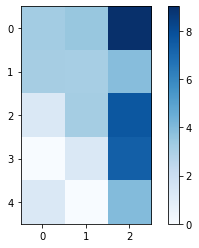

In [144]:
## unsymmetric
def calc_dist_matrix_1(res_obj1, res_obj2):
    dist = np.zeros((len(res_obj1), len(res_obj2)))
    # for x in res_obj:
    #     print(x.getCoords()[0][0], type(x.getCoords()[0][0]))
    atomcoords1 = np.array([x.getCoords() for x in res_obj1])
    atomcoords2 = np.array([x.getCoords() for x in res_obj2])
    for i,res1 in enumerate(atomcoords1):
        for j,res2 in enumerate(atomcoords2):
            print(i,j)
            value = []
            for atom1 in res1:
                for atom2 in res2:
                    value.append(getDistance(atom1, atom2))
    #         print(value)
            dist[i,j] = np.min(value)
    return(dist)

# %timeit dist_1 = calc_dist_matrix_1(res_obj1, res_obj2)
dist_1 = calc_dist_matrix_1(res_obj_1, res_obj_2)
np_plot(dist_1)

In [170]:
for x in res_obj_1[0].select('not backbone'):
    print(x)

Atom CB (index 8)
Atom OG (index 9)


0 0
[[ 17.672  -7.957 -31.365]
 [ 16.538  -7.121 -31.815]
 [ 15.487  -7.879 -32.65 ]
 [ 15.786  -8.907 -33.276]
 [ 17.04   -5.904 -32.594]
 [ 17.46   -6.287 -33.894]]
0 1
[0 0]
[[ 17.04   -5.904 -32.594]
 [ 17.46   -6.287 -33.894]]
0 2
[[ 17.672  -7.957 -31.365]
 [ 16.538  -7.121 -31.815]
 [ 15.487  -7.879 -32.65 ]
 [ 15.786  -8.907 -33.276]
 [ 17.04   -5.904 -32.594]
 [ 17.46   -6.287 -33.894]]
0 3
[[ 17.672  -7.957 -31.365]
 [ 16.538  -7.121 -31.815]
 [ 15.487  -7.879 -32.65 ]
 [ 15.786  -8.907 -33.276]
 [ 17.04   -5.904 -32.594]
 [ 17.46   -6.287 -33.894]]
1 1
[[ 14.271  -7.337 -32.683]
 [ 13.109  -8.043 -33.233]
 [ 13.142  -8.341 -34.734]
 [ 12.505  -9.293 -35.192]
 [ 11.818  -7.319 -32.861]
 [ 11.448  -7.472 -31.394]
 [ 11.378  -9.197 -30.858]
 [ 10.019  -9.813 -31.853]]
1 2
[1 1 1 1]
[[ 11.818  -7.319 -32.861]
 [ 11.448  -7.472 -31.394]
 [ 11.378  -9.197 -30.858]
 [ 10.019  -9.813 -31.853]]
1 3
[[ 14.271  -7.337 -32.683]
 [ 13.109  -8.043 -33.233]
 [ 13.142  -8.341 -34.734]
 [ 12

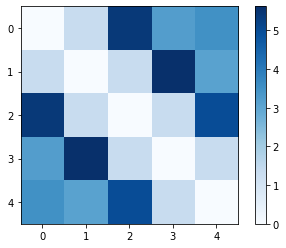

In [176]:
def calc_dist_matrix_sym(res_obj1, res_obj2):
    dist = np.zeros((len(res_obj1), len(res_obj2)))
    # for x in res_obj:
    #     print(x.getCoords()[0][0], type(x.getCoords()[0][0]))
    atomcoords1 = np.array([x.getCoords() for x in res_obj1])
    atomcoords2 = np.array([x.getCoords() for x in res_obj2])
    for i,res1 in enumerate(atomcoords1[:-1]):
        for j,res2 in enumerate(atomcoords[i+1:]):
            j_1 = i + j
            value = []
            res1_t = res1
            res2_t = res2
            print(i,j_1)
            if j_1-i==1:
                print(np.array([x.getResnum() for x in res_obj1[i].select('not backbone')]))
                res1_t = np.array([x.getCoords() for x in res_obj1[i].select('not backbone')])
                res2_t = np.array([x.getCoords() for x in res_obj2[j_1].select('not backbone')])
            print(res1_t)
            for atom1 in res1_t:
                for atom2 in res2_t:
                    value.append(getDistance(atom1, atom2))
    #         print(value)
            dist[i,j_1+1] = dist[j_1+1,i] = np.min(value)
    return(dist)

# %timeit dist_1 = calc_dist_matrix_1(res_obj1, res_obj2)
dist_1 = calc_dist_matrix_sym(res_obj_1, res_obj_1)
np_plot(dist_1)

In [146]:
x = None
if x and x < None:
    print ('x')

In [179]:
ca1 = np.array([13.109, -8.043, -33.233])
ca2 = np.array([13.977,  -7.732, -36.932])
print (getDistance(ca1,ca2))

3.81218388853424


In [181]:
ca8 = np.array([3.179, -19.708, -34.272])
ca9 = np.array([1.459, -18.878, -30.969])
print (getDistance(ca8,ca9))

3.815377962928441


In [198]:
structure_ca = pdbfile.parsePDB('./datafiles/pdb_files/4EOQ.pdb', chain='A')
res_list_here = [8,274]
hv = structure.getHierView()
chain = 'A'
ca_atoms = np.array(hv['A'])[res_list_here]

for atom in ca_atoms:
    print(atom.getResnum())
print (buildDistMatrix(ca_atoms))

@> 2559 atoms and 1 coordinate set(s) were parsed in 0.08s.


7
276


ValueError: one and two must have shape ([M,]N,3)

In [332]:
# structure = pdbfile.parsePDB('./datafiles/pdb_files/4EOQ.pdb', chain='A')
def select_res_1(file, chain, select):
    structure = pdbfile.parsePDB(file, chain=chain)
    hv = structure.getHierView()
    ca_atoms = np.array(hv[chain].select("resnum %s and ca"%" ".join([str(x) for x in select])))
    for atom in ca_atoms:
        print(atom, atom.getResnum())
    return(ca_atoms)
#     print (buildDistMatrix(ca_atoms))

def select_res_2(file, chain, select):
    structure = pdbfile.parsePDB(file, chain=chain)
    hv = structure.getHierView()
    atoms = np.array(hv[chain])[select]
    for atom in atoms:
        print(atom, type(atom))
    return(atoms)

def select_res_3(file, chain, select):
    structure = pdbfile.parsePDB(file, chain=chain)
    hv = structure.getHierView()
    print(type(hv[chain]))
    atoms = np.array(hv[chain].select("resnum %s and ca"%" ".join([str(x) for x in select])))
    print(type(atoms), atoms.shape)
    for atom in atoms:
        print(atom, atom.getResnum(), type(atom)) #.getResnum())
    return(atoms)
#     print (buildDistMatrix(ca_atoms))

def select_res_4(file, chain, select):
    atoms = pdbfile.parsePDB(file, chain=chain, subset = 'ca') #resnum %s'%" ".join([str(x) for x in select]))
#     atoms = np.array(hv[chain].select("resnum %s"%" ".join([str(x) for x in select])))
    print(type(atoms))
    for atom in atoms:
        print(atom, atom.getResnum(), type(atom))
    return(atoms)
#     print (buildDistMatrix(ca_atoms))

In [333]:
file = './datafiles/pdb_files/4EOQ.pdb'
chain = 'A'
select = [8, 274]
# select = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 148, 149, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 227, 262, 274]

# select_res_1(file, chain, select)
# klifs_ident_2 = select_res_2(file, chain, select)
klifs_ident_3 = select_res_3(file, chain, select)
# klifs_ident_4 = select_res_4(file, chain, select)
# select = [240]
# %timeit select_res_1(file, chain, select)
# %timeit select_res_2(file, chain, select)

@> 2559 atoms and 1 coordinate set(s) were parsed in 0.08s.


<class 'prody.atomic.chain.Chain'>
<class 'numpy.ndarray'> (2,)
Atom CA (index 72) 8 <class 'prody.atomic.atom.Atom'>
Atom CA (index 2189) 274 <class 'prody.atomic.atom.Atom'>


In [318]:
np_plot(buildDistMatrix(klifs_ident_3))

ValueError: one and two must have shape ([M,]N,3)

In [232]:
select = [40]
select_res_1(file, chain, select)

@> 2559 atoms and 1 coordinate set(s) were parsed in 0.09s.


TypeError: iteration over a 0-d array

In [171]:

file = './datafiles/pdb_files/processed_pdb/4EOQ_A.pdb'
chain = 'A'
res_list = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 148, 149, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 227, 262, 274]


structure= pdbfile.parsePDB(file, chain=chain)
hv = structure.getHierView()
obj = hv[chain]
res_obj = np.empty(len(res_list), dtype=Residue)
for i,res in enumerate(res_list):
    temp_obj = obj.getResidue(res)
    if temp_obj:
        res_obj[i] = temp_obj

# residues1 = residues2 = res_obj
# atomcoords1 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
# atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues2], dtype=np.ndarray)


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [228]:
def loop1(res_obj, res_list):
    residues1 = residues2 = res_obj
    atomcoords1 = atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
    res_list_1 = res_list_2 = res_list
    
    no_adj = True
    unitcell = None
    dist = np.zeros((len(atomcoords1), len(atomcoords1)))
    
    for i,res1 in enumerate(atomcoords1[:-1]):
        for j,res2 in enumerate(atomcoords2[i+1:]):
            j_1 = i + j + 1
            if res1 is None or res2 is None:
                value = 0
            else:
                res1_t = res1
                res2_t = res2
                temp_dist = []
                if no_adj and abs(res_list_2[j_1]-res_list_1[i])==1:
                    atom1_noadj = residues1[i].select('not backbone')
                    atom2_noadj = residues2[j_1].select('not backbone')
                    if atom1_noadj and atom2_noadj:
                        res1_t = [x.getCoords() for x in atom1_noadj]
                        res2_t = [x.getCoords() for x in atom2_noadj]
                    else:
                        res1_t = [np.array([5.0,0.0,0.0])]
                        res2_t = [np.array([0.0,0.0,0.0])]

                for atom1 in res1_t:
                    for atom2 in res2_t:
#                         print(getDistance(atom1, atom2, unitcell))
                        temp_dist.append(getDistance(atom1, atom2, unitcell))
                value = np.min(temp_dist)


            dist[i,j_1] = dist[j_1,i] = value
    return (dist)

In [181]:
loop1_mat = loop1(res_obj, res_list)
print(np.array_equal(loop1_mat, dist_matrix))

True


In [265]:
t1 = %timeit -n 1 -r 15 -o loop1(res_obj, res_list)
print (t1.best)

3.57 s ± 292 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)
3.4105115389684215


In [191]:
def loop2(res_obj, res_list):
    residues1 = residues2 = res_obj
    atomcoords1 = atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
    res_list_1 = res_list_2 = res_list
    
    no_adj = True
    unitcell = None
    dist = np.zeros((len(atomcoords1), len(atomcoords1)))
    
    for i,res1 in enumerate(atomcoords1[:-1]):
        for j,res2 in enumerate(atomcoords2[i+1:]):
            j_1 = i + j + 1
            if res1 is None or res2 is None:
                value = 0
            else:
                res1_t = res1
                temp_dist = []
                do_loop = True
                if no_adj and abs(res_list_2[j_1]-res_list_1[i])==1:
                    atom1_noadj = residues1[i].select('not backbone')
                    atom2_noadj = residues2[j_1].select('not backbone')
                    if atom1_noadj and atom2_noadj:
                        res1_t = [x.getCoords() for x in atom1_noadj]
                        res2 = [x.getCoords() for x in atom2_noadj]
                    else:
                        value = 5
                        do_loop = False
                        
                if do_loop:
                    for atom1 in res1_t:
                        for atom2 in res2:
    #                         print(getDistance(atom1, atom2, unitcell))
                            temp_dist.append(getDistance(atom1, atom2, unitcell))
                    value = np.min(temp_dist)

            dist[i,j_1] = dist[j_1,i] = value
    return (dist)

In [192]:
loop2_mat = loop2(res_obj, res_list)
print(np.array_equal(loop2_mat, dist_matrix))

True


In [258]:
t2 = %timeit -n 1 -r 15 -o loop2(res_obj, res_list)
print (t2.best)

3.71 s ± 248 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)
3.4073910190491006


In [223]:
def loop3(res_obj, res_list):
    residues1 = residues2 = res_obj
    atomcoords1 = atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
    res_list_1 = res_list_2 = res_list
    
    no_adj = True
    unitcell = None
    dist = np.zeros((len(atomcoords1), len(atomcoords1)))
    
    no_adj_res = [res.select('not backbone') for res in residues1]
    no_adj_res_coords = np.empty(len(atomcoords1), dtype=object)
    no_adj_res_truthy = [False] * len(atomcoords1)
    for i,x in enumerate(no_adj_res):
        if x:
            no_adj_res_coords[i] = x.getCoords()
            no_adj_res_truthy[i] = True
            
    for i,res1 in enumerate(atomcoords1[:-1]):
        for j,res2 in enumerate(atomcoords2[i+1:]):
            j_1 = i + j + 1
            if res1 is None or res2 is None:
                value = 0
            else:
                res1_t = res1
                temp_dist = []
                do_loop = True
                if no_adj and abs(res_list_2[j_1]-res_list_1[i])==1:
                    if no_adj_res_truthy[i] and no_adj_res_truthy[j_1]:
                        res1_t = no_adj_res_coords[i]
                        res2 = no_adj_res_coords[j_1]
                    else:
                        value = 5
                        do_loop = False
                        
                if do_loop:
                    for atom1 in res1_t:
                        for atom2 in res2:
    #                         print(getDistance(atom1, atom2, unitcell))
                            temp_dist.append(getDistance(atom1, atom2, unitcell))
                    value = np.min(temp_dist)

            dist[i,j_1] = dist[j_1,i] = value
    return (dist)

In [202]:
loop3_mat = loop3(res_obj, res_list)
print(np.array_equal(loop3_mat, dist_matrix))

True


In [259]:
t3 = %timeit -n 1 -r 15 -o loop3(res_obj, res_list)
print (t3.best)

3.48 s ± 52.4 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)
3.4235199980903417


In [239]:
def loop4(res_obj, res_list):
    residues1 = residues2 = res_obj
    atomcoords1 = atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
    res_list_1 = res_list_2 = res_list
    
    no_adj = True
    unitcell = None
    dist = np.zeros((len(atomcoords1), len(atomcoords1)))
    
    no_adj_res = [res.select('not backbone') for res in residues1]
    no_adj_res_coords = np.empty(len(atomcoords1), dtype=object)
    no_adj_res_truthy = [False] * len(atomcoords1)
    for i,x in enumerate(no_adj_res):
        if x:
            no_adj_res_coords[i] = x.getCoords()
            no_adj_res_truthy[i] = True
            
    for i,res1 in enumerate(atomcoords1[:-1]):
        for j,res2 in enumerate(atomcoords2[i+1:]):
            j_1 = i + j + 1
            if res1 is None or res2 is None:
                value = 0
            else:
                res1_t = res1
                temp_dist = []

                if no_adj and abs(res_list_2[j_1]-res_list_1[i])==1:
                    if no_adj_res_truthy[i] and no_adj_res_truthy[j_1]:
                        res1_t = no_adj_res_coords[i]
                        res2 = no_adj_res_coords[j_1]
                    else:
                        res1_t = [np.array([5.0,0.0,0.0])]
                        res2 = [np.array([0.0,0.0,0.0])]
                        
                for atom1 in res1_t:
                    for atom2 in res2:
#                         print(getDistance(atom1, atom2, unitcell))
                        temp_dist.append(getDistance(atom1, atom2, unitcell))
                value = np.min(temp_dist)

            dist[i,j_1] = dist[j_1,i] = value
    return (dist)



In [240]:
loop4_mat = loop4(res_obj, res_list)
print(np.array_equal(loop4_mat, dist_matrix))

True


In [260]:
t4 = %timeit -n 1 -r 15 -o loop4(res_obj, res_list)
print (t4.best)

3.46 s ± 45.3 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)
3.400057958904654


In [231]:
def loop5(res_obj, res_list):
    residues1 = residues2 = res_obj
    atomcoords1 = atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
    res_list_1 = res_list_2 = res_list
    
    no_adj = True
    unitcell = None
    dist = np.zeros((len(atomcoords1), len(atomcoords1)))
    
    for i,res1 in enumerate(atomcoords1[:-1]):
        for j,res2 in enumerate(atomcoords2[i+1:]):
            j_1 = i + j + 1
            if res1 is None or res2 is None:
                value = 0
            else:
                res1_t = res1
                temp_dist = []
                if no_adj and abs(res_list_2[j_1]-res_list_1[i])==1:
                    atom1_noadj = residues1[i].select('not backbone')
                    atom2_noadj = residues2[j_1].select('not backbone')
                    if atom1_noadj and atom2_noadj:
                        res1_t = [x.getCoords() for x in atom1_noadj]
                        res2 = [x.getCoords() for x in atom2_noadj]
                    else:
                        res1_t = [np.array([5.0,0.0,0.0])]
                        res2 = [np.array([0.0,0.0,0.0])]

                for atom1 in res1_t:
                    for atom2 in res2:
#                         print(getDistance(atom1, atom2, unitcell))
                        temp_dist.append(getDistance(atom1, atom2, unitcell))
                value = np.min(temp_dist)


            dist[i,j_1] = dist[j_1,i] = value
    return (dist)

In [232]:
loop5_mat = loop5(res_obj, res_list)
print(np.array_equal(loop5_mat, dist_matrix))

True


In [261]:
t5 = %timeit -n 1 -r 15 -o loop5(res_obj, res_list)
print (t5.best)

3.48 s ± 33.7 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)
3.435719935921952


In [244]:
def loop6(res_obj, res_list):
    residues1 = residues2 = res_obj
    atomcoords1 = atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
    res_list_1 = res_list_2 = res_list
    
    no_adj = True
    unitcell = None
    dist = np.zeros((len(atomcoords1), len(atomcoords1)))
    
    no_adj_res = [res.select('not backbone') for res in residues1]
    no_adj_res_coords = np.empty(len(atomcoords1), dtype=object)
    no_adj_res_truthy = [False] * len(atomcoords1)
    for i,x in enumerate(no_adj_res):
        if x:
            no_adj_res_coords[i] = x.getCoords()
            no_adj_res_truthy[i] = True
            
    if no_adj:        
        for i,res1 in enumerate(atomcoords1[:-1]):
            for j,res2 in enumerate(atomcoords2[i+1:]):
                j_1 = i + j + 1
                if res1 is None or res2 is None:
                    value = 0
                else:
                    res1_t = res1
                    temp_dist = []

                    if abs(res_list_2[j_1]-res_list_1[i])==1:
                        if no_adj_res_truthy[i] and no_adj_res_truthy[j_1]:
                            res1_t = no_adj_res_coords[i]
                            res2 = no_adj_res_coords[j_1]
                        else:
                            res1_t = [np.array([5.0,0.0,0.0])]
                            res2 = [np.array([0.0,0.0,0.0])]

                    for atom1 in res1_t:
                        for atom2 in res2:
    #                         print(getDistance(atom1, atom2, unitcell))
                            temp_dist.append(getDistance(atom1, atom2, unitcell))
                    value = np.min(temp_dist)

                dist[i,j_1] = dist[j_1,i] = value
    return (dist)

In [236]:
loop6_mat = loop6(res_obj, res_list)
print(np.array_equal(loop6_mat, dist_matrix))

True


In [262]:
t6 = %timeit -n 1 -r 15 -o loop6(res_obj, res_list)
print (t6.best)

3.46 s ± 50.7 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)
3.4015912540489808


#### get distance 

In [313]:
def loop7(res_obj, res_list):
    residues1 = residues2 = res_obj
    atomcoords1 = atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
    res_list_1 = res_list_2 = res_list
    
    no_adj = True
    unitcell = None
    dist = np.zeros((len(atomcoords1), len(atomcoords1)))
    
    no_adj_res = [res.select('not backbone') for res in residues1]
    no_adj_res_coords = np.empty(len(atomcoords1), dtype=object)
    no_adj_res_truthy = [False] * len(atomcoords1)
    for i,x in enumerate(no_adj_res):
        if x:
            no_adj_res_coords[i] = x.getCoords()
            no_adj_res_truthy[i] = True
            
    if no_adj:        
        for i,res1 in enumerate(atomcoords1[:-1]):
            for j,res2 in enumerate(atomcoords2[i+1:]):
                j_1 = i + j + 1
                if res1 is None or res2 is None:
                    value = 0
                else:
                    res1_t = res1
                    temp_dist = []

                    if abs(res_list_2[j_1]-res_list_1[i])==1:
                        if no_adj_res_truthy[i] and no_adj_res_truthy[j_1]:
                            res1_t = no_adj_res_coords[i]
                            res2 = no_adj_res_coords[j_1]
                        else:
                            res1_t = [np.array([5.0,0.0,0.0])]
                            res2 = [np.array([0.0,0.0,0.0])]

                    temp_append = temp_dist.append
                    for atom1 in res1_t:
                        temp_append(getDistance(atom1, res2, unitcell))
                    value = np.min(temp_dist)

                dist[i,j_1] = dist[j_1,i] = value
    return (dist)

In [315]:
loop7_mat = loop7(res_obj, res_list)
print(np.array_equal(loop7_mat, dist_matrix))

True


In [314]:
t7 = %timeit -n 1 -r 15 -o loop7(res_obj, res_list)
print (t7.best)

722 ms ± 89.9 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)
0.6264328160323203


In [268]:
def loop8(res_obj, res_list):
    residues1 = residues2 = res_obj
    atomcoords1 = atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
    res_list_1 = res_list_2 = res_list
    
    no_adj = True
    unitcell = None
    dist = np.zeros((len(atomcoords1), len(atomcoords1)))
    
    no_adj_res = [res.select('not backbone') for res in residues1]
    no_adj_res_coords = np.empty(len(atomcoords1), dtype=object)
    no_adj_res_truthy = [False] * len(atomcoords1)
    for i,x in enumerate(no_adj_res):
        if x:
            no_adj_res_coords[i] = x.getCoords()
            no_adj_res_truthy[i] = True
            
    if no_adj:
        for i,res1 in enumerate(atomcoords1[:-1]):
            for j,res2 in enumerate(atomcoords2[i+1:]):
                j_1 = i + j + 1
                if res1 is None or res2 is None:
                    value = 0
                else:
                    res1_t = res1
                    temp_dist = []
                    for atom1 in res1_t:
                        for atom2 in res2:
    #                         print(getDistance(atom1, atom2, unitcell))
                            temp_dist.append(getDistance(atom1, atom2, unitcell))
                    value = np.min(temp_dist)

                dist[i,j_1] = dist[j_1,i] = value
    return (dist)

In [270]:
t8 = %timeit -n 1 -r 15 -o loop8(res_obj, res_list)
print (t8.best)

3.92 s ± 367 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)
3.4848245929460973


In [294]:
print(loop8(res_obj, res_list))

[[ 0.          1.33520261  3.60901829 ... 41.35067869 33.29372037
  35.99821109]
 [ 1.33520261  0.          1.33016428 ... 37.49329749 33.78809604
  33.37667362]
 [ 3.60901829  1.33016428  0.         ... 34.8464683  29.34931594
  29.68180754]
 ...
 [41.35067869 37.49329749 34.8464683  ...  0.         16.12433078
   5.49190941]
 [33.29372037 33.78809604 29.34931594 ... 16.12433078  0.
   7.76201488]
 [35.99821109 33.37667362 29.68180754 ...  5.49190941  7.76201488
   0.        ]]


In [309]:
def loop9(res_obj, res_list):
    residues1 = residues2 = res_obj
    atomcoords1 = atomcoords2 = np.array([x.getCoords() if isinstance(x,Residue) else None for x in residues1], dtype=np.ndarray)
    res_list_1 = res_list_2 = res_list
    
    no_adj = True
    unitcell = None
    dist = np.zeros((len(atomcoords1), len(atomcoords1)))
    
    no_adj_res = [res.select('not backbone') for res in residues1]
    no_adj_res_coords = np.empty(len(atomcoords1), dtype=object)
    no_adj_res_truthy = [False] * len(atomcoords1)
    for i,x in enumerate(no_adj_res):
        if x:
            no_adj_res_coords[i] = x.getCoords()
            no_adj_res_truthy[i] = True
            
    if no_adj:
        for i,res1 in enumerate(atomcoords1[:-1]):
            for j,res2 in enumerate(atomcoords2[i+1:]):
                j_1 = i + j + 1
                if res1 is None or res2 is None:
                    value = 0
                else:
#                     res1_t = res1
                    temp_dist = []
                    for atom1 in res1:
                        for atom2 in res2:
    #                         print(getDistance(atom1, atom2, unitcell))
                            temp_dist.append(getDistance(atom1, atom2, unitcell))
                    value = np.min(temp_dist)

                dist[i,j_1] = dist[j_1,i] = value
        
        for i in range(0,len(res_list_1)-1):
            j = i+1
            if res_list_2[j]-res_list_1[i]==1:
                if no_adj_res_truthy[i] and no_adj_res_truthy[j]:
                    res1 = no_adj_res_coords[i]
                    res2 = no_adj_res_coords[j]
                else:
                    res1 = [np.array([5.0,0.0,0.0])]
                    res2 = [np.array([0.0,0.0,0.0])]
                temp_dist = []
                for atom1 in res1:
                    for atom2 in res2:
#                         print(getDistance(atom1, atom2, unitcell))
                        temp_dist.append(getDistance(atom1, atom2, unitcell))
                value = np.min(temp_dist)
                dist[i,j] = dist[j,i] = value
            
    return (dist)

In [306]:
loop9_mat = loop9(res_obj, res_list)
print(np.array_equal(loop9_mat, dist_matrix))

[[ 0.          1.33520261  3.60901829 ... 41.35067869 33.29372037
  35.99821109]
 [ 1.33520261  0.          1.33016428 ... 37.49329749 33.78809604
  33.37667362]
 [ 3.60901829  1.33016428  0.         ... 34.8464683  29.34931594
  29.68180754]
 ...
 [41.35067869 37.49329749 34.8464683  ...  0.         16.12433078
   5.49190941]
 [33.29372037 33.78809604 29.34931594 ... 16.12433078  0.
   7.76201488]
 [35.99821109 33.37667362 29.68180754 ...  5.49190941  7.76201488
   0.        ]]
True


In [311]:
t9 = %timeit -n 1 -r 15 -o loop9(res_obj, res_list)
print (t9.best)

3.52 s ± 40.7 ms per loop (mean ± std. dev. of 15 runs, 1 loop each)
3.4611571049317718


In [80]:
## original
%%timeit 
dist_matrix = build_shortest_dist_matrix(res_obj, res_list, min_dist=None, no_adj=True)

3.87 s ± 420 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
dist_matrix = build_shortest_dist_matrix(res_obj, res_list, min_dist=None, no_adj=True)

In [82]:
## remove res2_t
%%timeit 
dist_matrix_1 = build_shortest_dist_matrix(res_obj, res_list, min_dist=None, no_adj=True)

new
new
new
new
new
new
new
new
2.45 s ± 160 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [95]:
dist_matrix_1 = build_shortest_dist_matrix(res_obj, res_list, min_dist=None, no_adj=True)

new
sym


In [104]:
## remove res2_t and preinitialize the no_adj_res, no_adj_res_coords, no_adj_res_truthy
%%timeit 
dist_matrix_2 = build_shortest_dist_matrix(res_obj, res_list, min_dist=None, no_adj=True)

new
new
new
new
new
new
new
new
3.7 s ± 75.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [101]:
dist_matrix_2 = build_shortest_dist_matrix(res_obj, res_list, min_dist=None, no_adj=True)

new
sym


In [120]:
%%timeit 
dist_matrix_3 = build_shortest_dist_matrix(res_obj, res_list, min_dist=None, no_adj=True)

new
new
new
new
new
new
new
new
3.82 s ± 244 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [113]:
dist_matrix_3 = build_shortest_dist_matrix(res_obj, res_list, min_dist=None, no_adj=True)

new


In [114]:
print(np.array_equal(dist_matrix, dist_matrix_3))
print([(x,y) for x,y in zip(dist_matrix[0], dist_matrix_3[0])])

True
[(0.0, 0.0), (5.430538923532361, 5.430538923532361), (3.6090182875679613, 3.6090182875679613), (6.169557844772992, 6.169557844772992), (9.246413466852967, 9.246413466852967), (11.655571371665996, 11.655571371665996), (14.225020949017964, 14.225020949017964), (14.665467636594474, 14.665467636594474), (11.163702253284969, 11.163702253284969), (7.121883107718067, 7.121883107718067), (4.522772379857289, 4.522772379857289), (3.546679150980532, 3.546679150980532), (2.837702063289942, 2.837702063289942), (7.245339122497993, 7.245339122497993), (7.77011061697322, 7.77011061697322), (7.420423370670974, 7.420423370670974), (9.523300740814603, 9.523300740814603), (10.5280902826676, 10.5280902826676), (13.83933719511162, 13.83933719511162), (24.081891246328638, 24.081891246328638), (20.482436207638973, 20.482436207638973), (19.72713524564578, 19.72713524564578), (22.58671656084611, 22.58671656084611), (23.222182541699215, 23.222182541699215), (16.042914853604376, 16.042914853604376), (19.5068

In [111]:
from prody.utilities import getDistance
v1 = [[1,1,1],[1,2,3],[2,2,3]]
v2 = [[1,1,1],[1,2,3],[2,2,3]]
v1 = np.array(v1)
v2 = np.array(v2)
for v1 in enumerate(v1[:-1]):
    print(getDistance(v1,v2[i+1:],None))

ValueError: operands could not be broadcast together with shapes (2,) (1,3) 

In [100]:
for i,x in enumerate([[1,2], [2,3]]):
    for j,y in enumerate([[1,2], [2,3]]):
        print (i,x,j,y)
        x,y = [3,4], [3,4]
        

0 [1, 2] 0 [1, 2]
0 [3, 4] 1 [2, 3]
1 [2, 3] 0 [1, 2]
1 [3, 4] 1 [2, 3]


## testing PCA

In [85]:
DIST_MAT_DIR_REF = './datafiles/npy_files/ref/'
npy_files = glob.glob(DIST_MAT_DIR+"*.npy")
dist_mats_calc = []
for file in npy_files:
    print(file)
    dist_mat = np.load(file)
    dist_mats_calc.append(dist_mat)
print(dist_mats_calc[0][0])

ref_npy_files = glob.glob(DIST_MAT_DIR_REF+"*.npy")
dist_mats_ref = []
for file in ref_npy_files:
    print(file)
    dist_mat = np.load(file)
    dist_mats_ref.append(dist_mat)
print(dist_mats_ref[0][0])

./datafiles/npy_files/calc/2VU3_A.npy
./datafiles/npy_files/calc/4EOQ_A.npy
./datafiles/npy_files/calc/4EOQ_C.npy
./datafiles/npy_files/calc/6GUE_A.npy
./datafiles/npy_files/calc/6GUE_C.npy
[ 0.          5.50461025  3.59717959  6.28319648  9.43363228 12.21764634
 15.74182639 15.10016126 11.43221112  8.14445836  4.64448146  3.36561985
  2.7725766   7.14476935  7.71201588  7.23957547  9.443689   10.33136627
 13.48744027  0.         26.6382716  23.33807049 24.06840903 25.99443506
 24.14515123 19.91653808 23.63725807 25.06143414 19.4171271  21.07671552
 24.58584916 23.28874481 22.62967293 22.44361401 22.17257928 19.74247219
 14.79761423 15.87347325 16.48435055 14.57425298 15.94052298 17.78776765
 11.52568167 11.47562783 12.47325683 11.56440478 12.23875557  6.74217865
  9.96335661  8.64892288 10.9953085  11.77536267 15.82695407 16.06228471
 10.0000138  15.6178132  18.33517025 16.43053846 16.86579441 26.61828443
 27.32927934 25.77156582 29.62640878 32.73277112 30.7716896  30.87668488
 26.095

In [55]:
import glob
from scipy import linalg as LA
from sklearn import decomposition
import dist_analy.pca

DIST_MAT_DIR = './datafiles/npy_files/calc/'
CDK2_KLIFS_IDENT = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 148, 149, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 227, 262, 274]

triu_ind = np.triu_indices(len(CDK2_KLIFS_IDENT),k=1)

npy_files = glob.glob(DIST_MAT_DIR+"*.npy")
feats_list = []
dist_mats = []
for file in npy_files:
    dist_mat = np.load(file)
    dist_mats.append(dist_mat)
dist_mats, res_list, ind_list = dist_analy.pca.remove_missing(dist_mats, CDK2_KLIFS_IDENT)
feats_list = dist_analy.pca.triu_flatten(dist_mats, res_list)


100 [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 262, 274]


In [56]:
# %%timeit
npy_pca = decomposition.PCA()
npy_pca.fit(feats_list)

1.02 ms ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


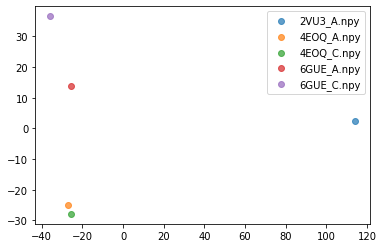

In [57]:
# print(npy_pca.components_.shape, feats_list.shape)
# print(npy_pca.explained_variance_ratio_)
# print(len(triu_ind[0]))
feats_list -= np.mean(feats_list, axis=0)
a = np.dot(feats_list, npy_pca.components_.T)
ax = plt.axes()
for dp, file in zip(a, npy_files):
    ax.scatter(dp[0], dp[1], label=file.split('/')[-1], alpha=0.7)
plt.legend()

In [65]:
def np_plot(array):
    fig, ax = plt.subplots()
    im = ax.imshow(array, cmap="Blues")
    cbar = ax.figure.colorbar(im,ax=ax)

15


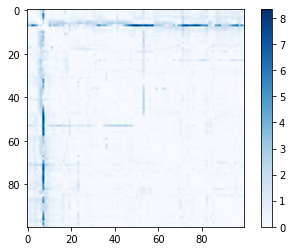

In [70]:
# print(dist_mats[3].shape, dist_mats[4].shape)
abs_diff = np.abs(np.subtract(dist_mats[1], dist_mats[3]))
np_plot(abs_diff)

for i,row in enumerate(abs_diff):
    if np.average(row) > 2.2:
        print(res_list[i])

In [66]:
# %%timeit
# R = np.cov(feats_list, rowvar=False)
# evals , evecs = LA.eigh(R)
# idx = np.argsort(evals)[::-1]
# evecs = evecs[:,idx]
# evals = evals[idx]

40.3 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
# R = np.cov(feats_list, rowvar=False)
# evals , evecs = LA.eigh(R)
# idx = np.argsort(evals)[::-1]
# evecs = evecs[:,idx]
# evals = evals[idx]

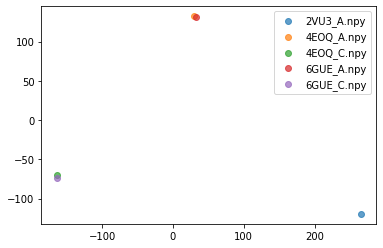

In [73]:
# feats_list -= np.mean(feats_list, axis=0)
# a = np.dot(feats_list, evecs)
# ax = plt.axes()
# for dp, file in zip(a, npy_files):
#     ax.scatter(-dp[0], -dp[1], label=file.split('/')[-1], alpha=0.7)
# plt.legend()

In [59]:
from dist_analy.dist_analy import get_shortest_dist_matrix
from dist_analy.import_pdb import get_any_info, process_pdb
from sklearn import decomposition
import dist_analy.pca

PDB_DIR = './datafiles/pdb_files/testing/'
OUTPATH = './datafiles/pdb_files/processed_pdb/'
SAVE_NPY = './datafiles/npy_files/calc/'
# TEST_PDB_LIST = ['2VU3.pdb', '5OO0.pdb']
MULTIPLE_CHAIN_PDB = ['4EOQ.pdb', '6GUE.pdb', '2VU3.pdb']
UNIPROT_CDK2 = 'P24941'

CDK2_KLIFS_IDENT = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 148, 149, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 227, 262, 274]


chain_list = ['A', 'C']
dist_mat_list = []
dist_mat_pdb = []
for pdb_fn in MULTIPLE_CHAIN_PDB:
    pdb_list = process_pdb(pdb_fn, PDB_DIR, OUTPATH, UNIPROT_CDK2)
    for proc in pdb_list:
        pdb = proc.split('.')[0]
        chain = proc.split(".")[0].split("_")[-1]
        print(OUTPATH+proc, chain)
        dist_mat = get_shortest_dist_matrix(OUTPATH+proc, CDK2_KLIFS_IDENT, chain)
        dist_mat_list.append(dist_mat)
        dist_mat_pdb.append(pdb)
    
# dist_mats, res_list, ind_list = dist_analy.pca.remove_missing(dist_mat_list, CDK2_KLIFS_IDENT)
# feats_list = dist_analy.pca.triu_flatten(dist_mats, res_list)
# print("PCA")
# npy_pca = decomposition.PCA()
# npy_pca.fit(feats_list)

# 

#         save(SAVE_NPY+pdb+".npy", dist_mat)



ImportError: cannot import name 'get_any_info'

100 [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 139, 142, 143, 144, 145, 146, 147, 163, 165, 167, 168, 169, 171, 174, 185, 187, 190, 192, 195, 220, 262, 274]
3
PCA
link_cols
dendrogram
plot PCA
cluster size: 2 g
cluster size: 2 r
cluster size: 1 #808080
cluster size: 0 c
[0.76982568 0.13869821]


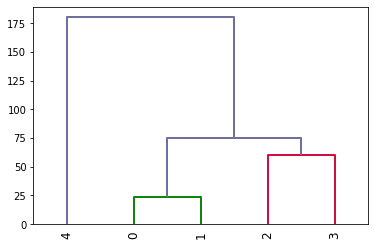

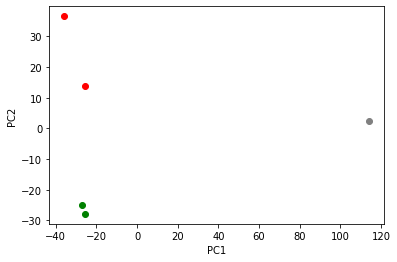

In [5]:
dist_mat_list = np.array(dist_mat_list)
dist_mats, res_list, ind_list, inds_fc, medoid_ind_list = dist_analy.pca.run(dist_mat_list, CDK2_KLIFS_IDENT)

In [31]:
print(np.array([feats[x] for x in inds_fc[c1] + inds_fc[c2]]).shape)
print(len(res_list))

(4, 4950)
100


In [28]:
for i,ind in enumerate(inds_fc):
    for x in ind:
        print (i,dist_mat_pdb[x])

0 4EOQ_A
0 4EOQ_C
1 6GUE_A
1 6GUE_C
2 2VU3_A


In [56]:
print(feats[:,1840])
val1 = np.divide(np.subtract(np.average(feats[inds_fc[c1], 1840]), np.average(feats[inds_fc[c2], 1840])), np.sqrt(np.multiply(np.std(feats[inds_fc[c1], 1840], axis=0),np.std(feats[inds_fc[c2], 1840], axis=0))))
print(np.divide(val1, (np.subtract(np.amin(feats[:,1840]),1.5))))


[15.87212327 15.8720304  14.91839713 14.91820428 19.36394113]
1062.282257826491


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3
A48-K129: 14.918, 1062.282

K33-Y77: 3.284, 48.489

F80-D145: 6.051, 47.171

L78-D145: 8.221, 43.282

V18-E81: 8.003, 42.873

L128-R169: 6.627, -34.313

L83-I135: 3.748, -34.039

L128-I192: 2.658, 32.002

V18-V30: 6.856, 31.967

G16-D185: 20.265, 30.396

[(20, 71, 1840, 1062.282257826491), (16, 41, 1488, 48.489375694675175), (44, 82, 3447, 47.170879467882486), (42, 82, 3336, 43.28195426863622), (10, 45, 979, 42.87329287475989), (70, 89, 4533, -34.31342495649692), (47, 77, 3601, -34.03898597548661), (70, 95, 4539, 32.0020094132664), (10, 13, 947, 31.9674521370088), (8, 92, 847, 30.395852565128042)]


/Users/echen10/Desktop/programs/dist_analy/dist_analy/pca.py:353: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.multiply(std_feats_c1, std_feats_c2)))


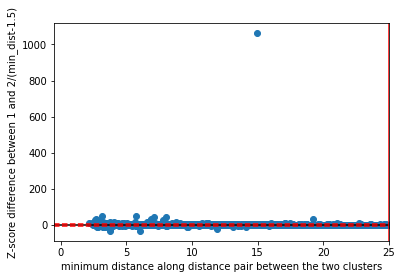

In [45]:
%load_ext autoreload
%autoreload 2

import dist_analy.pca
c1 = 0
c2 = 1

feats = dist_analy.pca.triu_flatten(dist_mats, res_list)
uniprot_sequence = 'MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPSTAIREISLLKELNHPNIVKLLDVIHTENKLYLVFEFLHQDLKKFMDASALTGIPLPLIKSYLFQLLQGLAFCHSHRVLHRDLKPQNLLINTEGAIKLADFGLARAFGVPVRTYTHEVVTLWYRAPEILLGCKYYSTAVDIWSLGCIFAEMVTRRALFPGDSEIDQLFRIFRTLGTPDEVVWPGVTSMPDYKPSFPKWARQDFSKVVPPLDEDGRSLLSQMLHYDPNKRISAKAALAHPFFQDVTKPVPHLRL'

zscore, min_dist = dist_analy.pca.calc_cluster_zscore(inds_fc[c1], inds_fc[c2], feats)
dist_analy.pca.plot_zscore(c1, c2, feats, min_dist, zscore, res_list, uniprot_sequence, xcutoff=25)

[[  0.           1.          23.32296937   2.        ]
 [  2.           3.          60.42729169   2.        ]
 [  5.           6.          75.33122122   4.        ]
 [  4.           7.         180.25167405   5.        ]]
['4', '0', '1', '2', '3']
[4, 0, 1, 2, 3]


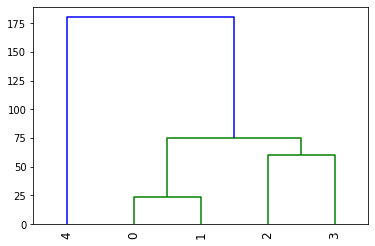

In [41]:
import scipy.cluster.hierarchy as sch
k=2
Z = sch.linkage(feats_list,method='ward')
fc = sch.fcluster(Z,t=k,criterion='maxclust')
ct=Z[-(k-1),2]
R = sch.dendrogram(Z, no_plot=False, leaf_rotation=90., color_threshold=ct)
print(Z)
print(R['ivl'])
ind_map = [int(x) for x in R['ivl']]
print(ind_map)

In [37]:
print(fc)
print(dist_analy.pca.get_indices(fc,ind_map,[1]))

[1 1 1 1 2]
[]


In [42]:
for i,inv in enumerate(ind_map):
    print(inv)

4
0
1
2
3


## getting uniprot sequences

In [2]:
from dist_analy.util import http_requests 
def get_some_info(pdb, url_root, *args):
    url = url_root + pdb + "/"

    for arg in args:
        url += str(arg)

    response = http_requests.request_limited(url)

    if response and response.status_code == 200:
        pass
    else:
        raise ValueError("json retrieval failed, returning None")
        return None

    result  = str(response.text)
    out = json.loads(result)

    return out

In [48]:
import requests
import json

## try again to make a function that accepets a wide range of inputs

def get_some_info_1(url_root, *url_append, **request_dict):
    if url_append:
        for app in url_append:
            url_root += str(app) + '/'
        print(url_root)
        response = http_requests.request_limited(url_root)
        print(response.url)
        
    if request_dict:
        response = requests.get(url_root, request_dict)
#         response = http_requests.request_limited(url_root, params=request_dict)
        print(response.url)

    if response and response.status_code == 200:
        pass
    else:
        raise ValueError("json retrieval failed, returning None")
        return None

    result  = str(response.text)
    out = json.loads(result)

    return out


In [49]:
pdb = '2WPA'
uniprot_url = 'https://data.rcsb.org/rest/v1/core/uniprot/'
assert get_some_info_1(uniprot_url, pdb, str(1))[0]['rcsb_uniprot_container_identifiers']['uniprot_id'] == 'P24941'

https://data.rcsb.org/rest/v1/core/uniprot/2WPA/1/
https://data.rcsb.org/rest/v1/core/uniprot/2WPA/1/


In [39]:
request_dict = {
    'plain' : '2',
    'qtype' : 'pdb',
    'id' : '4eoq'
}
out = get_some_info_1('','http://www.bioinf.org.uk/servers/pdbsws/query.cgi', **request_dict)
print(out)

here <class 'dict'>
{'plain': '2', 'qtype': 'pdb', 'id': '4eoq'}
http://www.bioinf.org.uk/servers/pdbsws/query.cgi?plain=2&qtype=pdb&id=4eoq
http://www.bioinf.org.uk/servers/pdbsws/query.cgi?plain=2&qtype=pdb&id=4eoq
{'pdbsws': [{'PDB': '4eoq', 'CHAIN': 'A', 'AC': 'P24941', 'ID': 'CDK2_HUMAN', 'START': '1', 'STOP': '297'}, {'PDB': '4eoq', 'CHAIN': 'B', 'AC': 'P20248', 'ID': 'CCNA2_HUMAN', 'START': '175', 'STOP': '432'}, {'PDB': '4eoq', 'CHAIN': 'C', 'AC': 'P24941', 'ID': 'CDK2_HUMAN', 'START': '1', 'STOP': '297'}, {'PDB': '4eoq', 'CHAIN': 'D', 'AC': 'P20248', 'ID': 'CCNA2_HUMAN', 'START': '175', 'STOP': '432'}]}


In [40]:
request_dict = {
    "kinase_group": "CMGC",
    "kinase_family": "CDK",
    "species": "Human"
}

kinase_names = get_some_info_1('','https://klifs.net/api/kinase_names', **request_dict)

print(kinase_names)

here <class 'dict'>
{'kinase_group': 'CMGC', 'kinase_family': 'CDK', 'species': 'Human'}
https://klifs.net/api/kinase_names?kinase_group=CMGC&kinase_family=CDK&species=Human
https://klifs.net/api/kinase_names?kinase_group=CMGC&kinase_family=CDK&species=Human
[{'kinase_ID': 197, 'name': 'CDK1', 'full_name': 'cyclin-dependent kinase 1', 'species': 'Human'}, {'kinase_ID': 200, 'name': 'CDK10', 'full_name': 'cyclin-dependent kinase 10', 'species': 'Human'}, {'kinase_ID': 1103, 'name': 'CDK11A', 'full_name': 'cyclin dependent kinase 11A', 'species': 'Human'}, {'kinase_ID': 215, 'name': 'CDK11B', 'full_name': 'cyclin-dependent kinase 11B', 'species': 'Human'}, {'kinase_ID': 209, 'name': 'CDK12', 'full_name': 'cyclin-dependent kinase 12', 'species': 'Human'}, {'kinase_ID': 208, 'name': 'CDK13', 'full_name': 'cyclin-dependent kinase 13', 'species': 'Human'}, {'kinase_ID': 213, 'name': 'CDK14', 'full_name': 'cyclin-dependent kinase 14', 'species': 'Human'}, {'kinase_ID': 214, 'name': 'CDK15', '

In [206]:
# # get_some_info_1('4eoq', 'https://data.rcsb.org/rest/v1/core/polymer_entity/', 1)
# request_dict = {
#   "query": {
#     "type": "terminal",
#     "service": "text",
#     "parameters": {
#       "value": "thymidine kinase"
#     }
#   },
#   "return_type": "entry"
# }
# request_json = json.dumps(request_dict, indent = 0)
# print(request_json)
# # get_some_info_1('', 'https://search.rcsb.org/rcsbsearch/v1/query?json=', request_json)

# response = requests.get('https://search.rcsb.org/rcsbsearch/v1/query?json=', params=request_json)
# print(response.url)
# print("https://search.rcsb.org/rcsbsearch/v1/query?json=%7B%22query%22:%7B%22type%22:%22terminal%22,%22service%22:%22text%22,%22parameters%22:%7B%22value%22:%22thymidine%20kinase%22%7D%7D,%22return_type%22:%22entry%22%7D")
# result  = str(response.text)
# out = json.loads(result)
# print(out)
                            

{"query": {"type": "terminal", "service": "text", "parameters": {"value": "thymidine kinase"}}, "return_type": "entry"}


InvalidHeader: Value for header {query: {'type': 'terminal', 'service': 'text', 'parameters': {'value': 'thymidine kinase'}}} must be of type str or bytes, not <class 'dict'>

In [24]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

prot_list = ['CDK2', 'CDK4', 'CDK6']
uniprot_list = [ 'P24941', 'P11802', 'Q00534']
sequence_list = []
for unip, prot in zip(uniprot_list, prot_list):
    uniprot_info = get_some_info_1('http://www.ebi.ac.uk/proteins/api/proteins/', unip)
    temp_rec = SeqRecord(Seq(uniprot_info['sequence']['sequence']), id=unip, name=prot, description = '')
    sequence_list.append(temp_rec)

In [229]:
from Bio import SeqIO

path = "./datafiles/fasta/"
fasta_file = "cdk246.fasta"
with open(path+fasta_file, "w") as outf:
    SeqIO.write(sequence_list, outf, "fasta")
    

In [235]:
from Bio.Align.Applications import ClustalwCommandline
import os

clustalw_exe = '/Users/echen10/Desktop/programs/clustal-omega-1.2.3-macosx'
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"

outpath = "./datafiles/align/"
align_file = "cdk246.al"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=path+fasta_file, outfile=outpath+align_file)
stdout, stderr = clustalw_cline()


In [62]:
from Bio import AlignIO
outpath = "./datafiles/align/"
align_file = "cdk246.al"
align = AlignIO.read(outpath+align_file, "clustal")
print(align[0])

ID: P24941
Name: <unknown name>
Description: P24941
Number of features: 0
Seq('---------MENFQKVEKIGEGTYGVVYKARNKL-TGEVVALKKIRLDTE---T...---')


In [63]:
for x in align:
    print(x)

ID: P24941
Name: <unknown name>
Description: P24941
Number of features: 0
Seq('---------MENFQKVEKIGEGTYGVVYKARNKL-TGEVVALKKIRLDTE---T...---')
ID: P11802
Name: <unknown name>
Description: P11802
Number of features: 0
Seq('-------MATSRYEPVAEIGVGAYGTVYKARDPH-SGHFVALKSVRVPNGGGGG...---')
ID: Q00534
Name: <unknown name>
Description: Q00534
Number of features: 0
Seq('MEKDGLCRADQQYECVAEIGEGAYGKVFKARDLKNGGRFVALKRVRVQTG---E...NTA')


In [57]:
# request_dict = {
#     "kinase_name": "CDK2",
#     "species": "Human"
#   }

def temp_get_info(url_root, **request_dict):
    response = requests.get(url_root, params=request_dict)
    print(response.url)
    result  = str(response.text)
    out = json.loads(result)
    return (out)

request_dict = {
    "kinase_group": "CMGC",
    "kinase_family": "CDK",
    "species": "Human"
}

kinase_names = get_some_info_1('https://klifs.net/api/kinase_names', **request_dict)

print(kinase_names)
# response = requests.get('https://klifs.net/api/kinase_names', params=request_dict)
# result  = str(response.text)
# kinase_names = json.loads(result)

# print(kinase_names)
# get_some_info_1('', 'https://klifs.net/api/kinase_names', request_dict)

https://klifs.net/api/kinase_names?kinase_group=CMGC&kinase_family=CDK&species=Human
[{'kinase_ID': 197, 'name': 'CDK1', 'full_name': 'cyclin-dependent kinase 1', 'species': 'Human'}, {'kinase_ID': 200, 'name': 'CDK10', 'full_name': 'cyclin-dependent kinase 10', 'species': 'Human'}, {'kinase_ID': 1103, 'name': 'CDK11A', 'full_name': 'cyclin dependent kinase 11A', 'species': 'Human'}, {'kinase_ID': 215, 'name': 'CDK11B', 'full_name': 'cyclin-dependent kinase 11B', 'species': 'Human'}, {'kinase_ID': 209, 'name': 'CDK12', 'full_name': 'cyclin-dependent kinase 12', 'species': 'Human'}, {'kinase_ID': 208, 'name': 'CDK13', 'full_name': 'cyclin-dependent kinase 13', 'species': 'Human'}, {'kinase_ID': 213, 'name': 'CDK14', 'full_name': 'cyclin-dependent kinase 14', 'species': 'Human'}, {'kinase_ID': 214, 'name': 'CDK15', 'full_name': 'cyclin-dependent kinase 15', 'species': 'Human'}, {'kinase_ID': 210, 'name': 'CDK16', 'full_name': 'cyclin-dependent kinase 16', 'species': 'Human'}, {'kinase_ID

In [58]:
# if out[0][uniprot] == out[0]['kinase_ID']

# for dict_iter in kinase_names[0]:
#     if dict_iter['uniprot'] in uniprot_list:

request_dict = {
    "pdb-codes": ["4EOQ"] 
}

struct_list = get_some_info_1('https://klifs.net/api/structures_pdb_list', **request_dict)
print(struct_list)


## run this in import pdb
## can probably choose an arbitrary PDB id. 
print(type(3912))
request_dict = {
    "structure_ID": 3912
}
match_info = get_some_info_1('https://klifs.net/api/interactions_match_residues', **request_dict)
print(match_info)

https://klifs.net/api/structures_pdb_list?pdb-codes=4EOQ
[{'structure_ID': 3912, 'kinase': 'CDK2', 'species': 'Human', 'kinase_ID': 198, 'pdb': '4eoq', 'alt': 'B', 'chain': 'C', 'rmsd1': '0.773', 'rmsd2': '2.085', 'pocket': 'EKIGEGTYGVVYKVALKKITAIREISLLKELNPNIVKLLDVYLVFEFLH_QDLKKFMDAFCHSHRVLHRDLKPQNLLILADFGLA', 'resolution': '2.15', 'quality_score': '8', 'missing_residues': 0, 'missing_atoms': 0, 'ligand': 'ATP', 'allosteric_ligand': 0, 'DFG': 'in', 'aC_helix': 'in', 'Grich_distance': '17.8763', 'Grich_angle': '59.5694', 'Grich_rotation': '74.3043', 'front': True, 'gate': False, 'back': False, 'fp_I': False, 'fp_II': True, 'bp_I_A': False, 'bp_I_B': False, 'bp_II_in': False, 'bp_II_A_in': False, 'bp_II_B_in': False, 'bp_II_out': False, 'bp_II_B': False, 'bp_III': False, 'bp_IV': False, 'bp_V': False}, {'structure_ID': 4004, 'kinase': 'CDK2', 'species': 'Human', 'kinase_ID': 198, 'pdb': '4eoq', 'alt': 'A', 'chain': 'C', 'rmsd1': '0.773', 'rmsd2': '2.085', 'pocket': 'EKIGEGTYGVVYKVALKKIT

In [55]:
print([int(temp_dict['Xray_position']) for temp_dict in match_info if temp_dict['Xray_position'] != '_'])

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 35, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 143, 144, 145, 146, 147, 148, 149]


In [3]:
# import klifs_utils as klifs
# import opencadd.databases.klifs
# from opencadd.databases.klifs.schema import DATAFRAME_COLUMNS
# import opencadd.databases.klifs.schema as sch
# print(sch.__file__)
import opencadd.databases.klifs
# vars(klifs.schema)

# import sys
# print(sys.modules)
# import opencadd.databases
# print(opencadd.__file__)

ModuleNotFoundError: No module named 'simplejson'

In [312]:
align_seq = [obj.seq for obj in align]
res_count = [0 for obj in align]
cons_id = [[] for obj in align]

for i in range(0,len(align_seq[0])):
    temp_set = set()
    for j,seq in enumerate(align_seq):
        temp_set.add(seq[i])
        if seq[i]!='-':
            res_count[j] += 1
    if len(temp_set) == 1:
        for j,res in enumerate(res_count):
            cons_id[j].append(res)

print([sequence_list[0].seq[x] for x in cons_id[0]])
print([sequence_list[1].seq[x] for x in cons_id[1]])#[cons_id[0]])
print([sequence_list[2].seq[x] for x in cons_id[2]])
# print(cons_id)
# for resid in align[0].seq:
#     temp_set = {}
    

['E', 'G', 'E', 'T', 'G', 'V', 'Y', 'A', 'R', 'N', 'E', 'A', 'L', 'K', 'K', 'L', 'V', 'S', 'E', 'I', 'K', 'P', 'N', 'I', 'K', 'L', 'V', 'I', 'N', 'L', 'V', 'F', 'E', 'F', 'D', 'L', 'K', 'A', 'I', 'L', 'K', 'S', 'L', 'Q', 'L', 'A', 'C', 'S', 'R', 'D', 'L', 'K', 'P', 'Q', 'L', 'I', 'A', 'L', 'A', 'D', 'F', 'G', 'L', 'A', 'R', 'A', 'H', 'V', 'T', 'L', 'W', 'Y', 'R', 'A', 'P', 'E', 'I', 'L', 'G', 'S', 'A', 'D', 'I', 'S', 'L', 'C', 'I', 'F', 'A', 'E', 'M', 'V', 'R', 'F', 'P', 'D', 'E', 'Q', 'L', 'F', 'F', 'T', 'D', 'V', 'P', 'G', 'D', 'P', 'P', 'D', 'R', 'L', 'S', 'H', 'N', 'R', 'I', 'S', 'A', 'K', 'L', 'A', 'P']
['A', 'G', 'V', 'A', 'G', 'T', 'Y', 'A', 'R', 'D', 'H', 'A', 'L', 'K', 'S', 'V', 'L', 'I', 'E', 'V', 'R', 'P', 'N', 'V', 'R', 'M', 'V', 'C', 'I', 'V', 'V', 'F', 'E', 'H', 'D', 'L', 'R', 'K', 'L', 'A', 'K', 'D', 'F', 'R', 'L', 'D', 'L', 'A', 'R', 'D', 'L', 'K', 'P', 'E', 'I', 'V', 'T', 'L', 'A', 'D', 'F', 'G', 'L', 'A', 'R', 'I', 'P', 'V', 'T', 'L', 'W', 'Y', 'R', 'A', 'P', 'E', 'V'

In [115]:
## Bio python has not updated their data format changes announced by Uniprot
## https://www.biostars.org/p/433276/

from Bio import ExPASy
from Bio import SwissProt

sequence_list_1 = []
for unip in uniprot_list:
    handle = ExPASy.get_sprot_raw(unip)
    record = SwissProt.read(handle)
    sequence_list_1.append(repr(record.seq))

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:777)>